# Mapping Evaluation

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys, rospy, rosbag, glob, re, math

import scipy
import scipy.stats
from scipy.stats import pearsonr

from smap.msg import smapStats

from IPython.display import HTML, display

from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib import cm
from numpy import linspace
from matplotlib.colors import LogNorm
from decimal import *

bag = rosbag.Bag("stats.bag")
stats = None
for _, msg, _ in bag.read_messages(topics=['stats']):
    stats = msg
bag.close()
if stats is None:
    print "Stats could not be loaded."
else:
    print "Stats loaded successfully."

Stats loaded successfully.


## True Error and Std(True Error) Evoluation of SMAP vs Log Odds

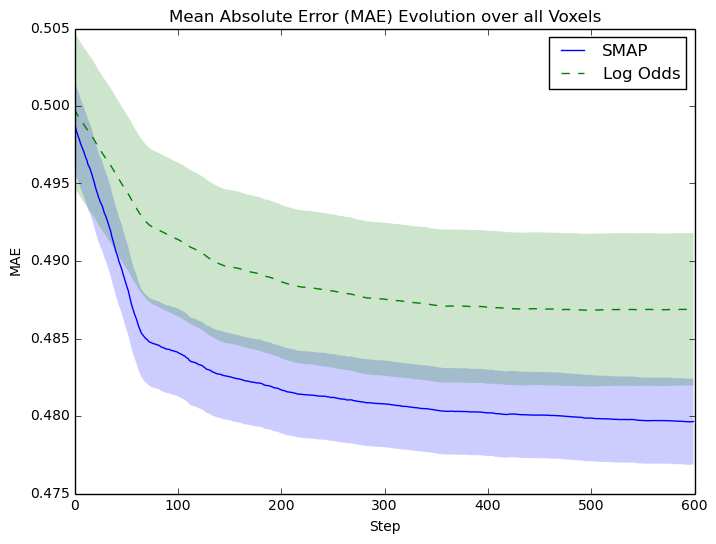

In [30]:
%matplotlib inline
fig, (ax) = plt.subplots(1, 1, figsize=(8, 6))
ax = plt.subplot(111)
plt.title("Mean Absolute Error (MAE) Evolution over all Voxels")

x = list(range(stats.step))
FACTOR = 0.01
errBelief = np.array(stats.errorEvolutionBelief)
stdBelief = np.array(stats.stdEvolutionBelief)
errLogOdds = np.array(stats.errorEvolutionLogOdds)
stdLogOdds = np.array(stats.stdEvolutionLogOdds)

ax.fill_between(x, errBelief - FACTOR*stdBelief, errBelief + FACTOR*stdBelief,
    alpha=0.2, facecolor='b', edgecolor='none', antialiased=True)
ax.fill_between(x, errLogOdds - FACTOR*stdLogOdds, errLogOdds + FACTOR*stdLogOdds,
    alpha=0.2, facecolor='g', edgecolor='none', antialiased=True)


ax.plot(stats.errorEvolutionBelief, label="SMAP", color='b')
ax.plot(stats.errorEvolutionLogOdds, label="Log Odds", linestyle='dashed', color='g')

ax.legend()
ax.set_xlim([0, len(stats.errorEvolutionBelief)])
ax.set_xlabel("Step")
ax.set_ylabel("MAE")

The diagram visualizes the full map true error evolution and corresponding standard deviation (multiplied by a factor of 0.08) of log-odds (green) and the proposed method (blue). Note how the estimated standard deviation spans a considerably larger region at log-odds compared to SMAP.